<a href="https://colab.research.google.com/github/Kennethkcpdhs/Honey_Pancake/blob/master/sorting_time_complexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

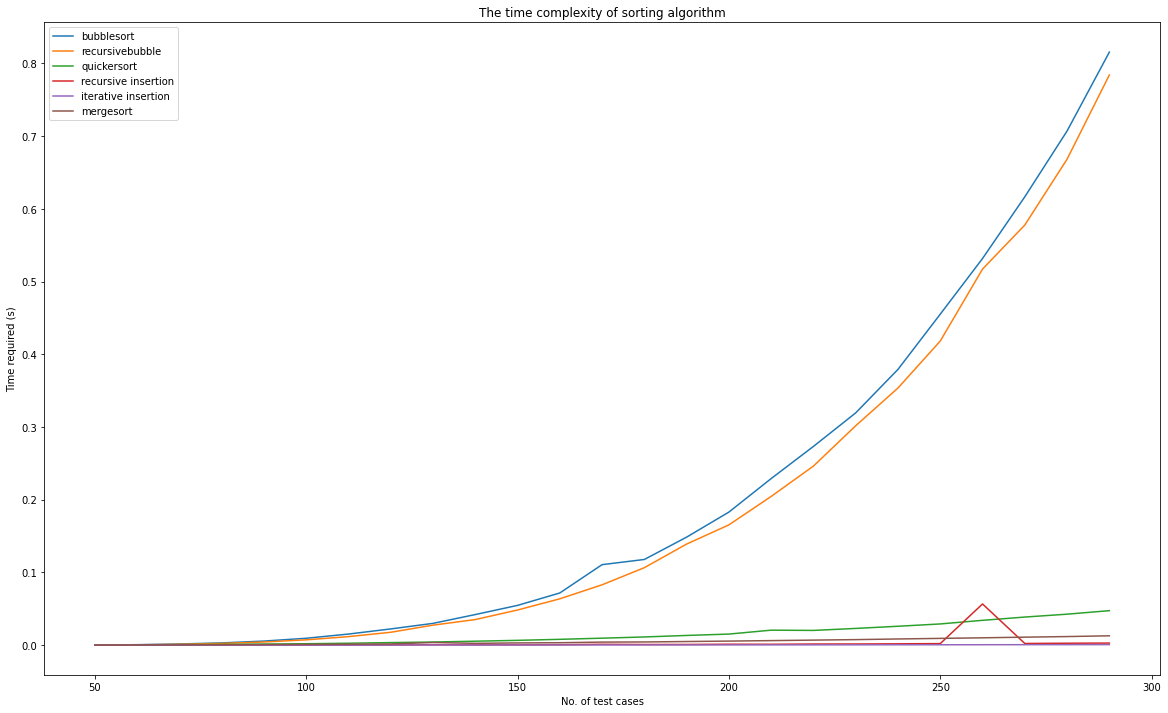

In [2]:
import sys
sys.setrecursionlimit(5000)
import matplotlib.pyplot as plt
import random
import time

def bubblesort(arr):
    lenarr = len(arr)
    for i in range(lenarr):
        swapmulti = False
        for k in range(0, lenarr-i-1):
            if arr[k]>arr[k+1]:
                arr[k],arr[k+1] = arr[k+1], arr[k]
                swapmulti = True
                #do not need to go through loop again (efficient)
        if swapmulti == False:
            break
    return arr

def recursivebubble(arr,i):
    if len(arr)>1 and i<len(arr):
        swapmulti = False
        for k in range(0, len(arr)-i):
            if arr[k]>arr[k+1]:
                arr[k],arr[k+1] = arr[k+1], arr[k]
                swapmulti = True
        
        else:
            return recursivebubble(arr,i+1)
    else:
        return arr

def insertionsort(arr): 
    # Traverse through 1 to len(arr) 
    for i in range(1, len(arr)): 
        key = arr[i] 
        j = i-1
        while j >= 0 and key < arr[j] : 
                arr[j + 1] = arr[j] 
                j -= 1
        arr[j + 1] = key 
    return arr

def recinsertion(arr,i):
    #base case, stop iterating once it reaches end of arr
    if i>0 and i<len(arr):
        key = arr[i]
        temp = i-1
        while temp >= 0 and key < arr[temp]:
            arr[temp+1] = arr[temp]
            temp -= 1 
        arr[temp+1] = key
        #print(arr)
        return recinsertion(arr,i+1)
    else:
       #pass
       return arr

def quickersort(arr):
    if len(arr)>1:
        #arr[0] is the pivot
        return quickersort([i for i in arr[1:] if i < arr[0]])+[arr[0]]+quickersort([i for i in arr[1:] if i > arr[0]])

    else:
        return arr
    
def mergesort(arr):
    #print(arr)
    if len(arr)>1:
        mid = len(arr)//2
        low = arr[:mid]
        high = arr[mid:]
        mergesort(low)
        mergesort(high)
        
        i=j=k=0
        # i is for the low array index
        # j is for the high array index
        # k if for the final array index
        
        while i<len(low) and j<len(high):
            if low[i] <= high[j]: # change sign of this for asceding/descending <=
                arr[k] = low[i]
                i+=1
            else:
                arr[k] = high[j]
                j+=1
            k+=1 #ensure that index of final array increases
        
        while i<len(low):
            arr[k] = low[i]
            i+=1
            k+=1
            
        while j<len(high):
            arr[k] = high[j]
            j+=1
            k+=1
    return(arr)

quick_testarr = []
testcases = 50
numtestcase_y = []
iter_x = []
quick = []
rec_bubble = []
merge = []
reci = []
iterinser = []

for i in range(25):    
    for k in range(testcases):
        #test array for quicksort to run on
        quick_testarr.append(random.randint(0,testcases))
    
    numtestcase_y.append(testcases)
    
    #iter
    a = time.time()
    bubblesort(quick_testarr)
    b = time.time()
    #get the time required for each sort
    iter_x.append(b-a)
    

    #quick
    c = time.time()
    quickersort(quick_testarr)
    d = time.time()
    #get the time required for each sort
    quick.append(d-c)
    
    #recursivebubble
    e = time.time()
    recursivebubble(quick_testarr,1)
    f = time.time()
    #get the time required for each sort
    rec_bubble.append(f-e)
    
    #insertionrecursive
    g = time.time()
    recinsertion(quick_testarr,1)
    h = time.time()
    #get the time required for each sort
    reci.append(h-g)
    
    #insertion iterative
    i = time.time()
    insertionsort(quick_testarr)
    j = time.time()
    #get the time required for each sort
    iterinser.append(j-i)
    
    #merge
    k = time.time()
    mergesort(quick_testarr)
    l = time.time()
    #get the time required for each sort
    merge.append(l-k)
    
    
    #increase the number of test case linearly for each round
    testcases = testcases+10

#time complexity
plt.rcParams['figure.figsize'] = [20, 12]
plt.plot(numtestcase_y,iter_x, label="bubblesort")
plt.plot(numtestcase_y,rec_bubble,label="recursivebubble")
plt.plot(numtestcase_y,quick,label="quickersort")
plt.plot(numtestcase_y,reci,label="recursive insertion")
plt.plot(numtestcase_y,iterinser,label="iterative insertion")
plt.plot(numtestcase_y,merge,label="mergesort")
plt.title('The time complexity of sorting algorithm')
plt.legend(loc="upper left")
plt.xlabel('No. of test cases')
plt.ylabel('Time required (s)')

plt.show()
